# Analyzing Employee Exit Surveys: DETE vs. TAFE Institutions

## Project Overview

In this project, we analyze exit surveys from employees of two Australian institutions:
- **DETE** (Department of Education, Training and Employment)
- **TAFE** (Technical and Further Education) 

Our goal is to determine whether employees resigning due to **dissatisfaction** show patterns related to:
- Length of employment (short-term vs. long-term)
- Age demographics (younger vs. older employees)

### Key Questions
1. Are short-term employees resigning due to dissatisfaction more frequently than long-term employees?
2. Do younger employees cite dissatisfaction as their reason for resignation more often than older employees?

---

## About the Data

### Datasets
1. **`dete_survey.csv`**  
   - Contains exit survey responses from DETE employees.
   - Key columns: `ID`, `SeparationType`, `Cease Date`, `DETE Start Date`.

2. **`tafe_survey.csv`**  
   - Contains exit survey responses from TAFE employees (modified to UTF-8 encoding).
   - Key columns: `Record ID`, `Reason for ceasing employment`, `LengthofServiceOverall`.

### Challenges
- No data dictionary provided (columns inferred using domain knowledge).
- Slight answer customization between surveys requires alignment during analysis.

---

## Approach

We will leverage the following data cleaning and analysis techniques:
- **String Operations**: Clean text-based columns (e.g., `SeparationType`).
- **Handling Missing Data**: Use `fillna()`, `dropna()`, or `drop()`.
- **Data Transformation**: Apply `map()` and `apply()` for custom logic.
- **Reshaping Data**: Use `melt()` to restructure columns.
- **Combining Data**: Merge DETE and TAFE datasets with `concat()` or `merge()`.

Let’s start by loading the datasets and exploring their structure!

In [1]:
# Necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dete_survey = pd.read_csv('../data/dete_survey.csv', na_values='Not Stated')
# tafe_survey = pd.read_csv('../data/tafe_survey.csv')
tafe_survey = pd.read_csv('../data/tafe_survey.csv')

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

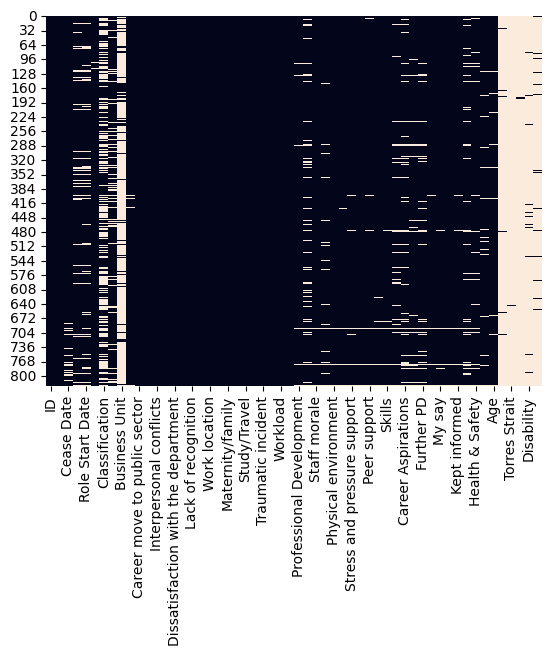

In [6]:
sns.heatmap(dete_survey.isnull(), cbar=False)
plt.show()

We are going to drop columns that won't be useful for our analysis

### Observations from Missing Data Analysis

#### **DETE Survey**
1. **Key Dissatisfaction Columns Are Complete**:  
   - Columns directly related to dissatisfaction (e.g., `Job dissatisfaction`, `Dissatisfaction with the department`) have **0 missing values**, making them reliable for analysis.
   - Demographic columns like `Age` and `Gender` have minimal missing values (`11` and `24` respectively), which is manageable.

2. **High Missingness in Specific Columns**:  
   - `Classification` (367 missing), `Business Unit` (696 missing), and `Aboriginal` (806 missing) have significant gaps. These columns may need to be excluded or imputed cautiously if used in analysis.

3. **Potential Red Flags**:  
   - `Career Aspirations` (76 missing) and `Opportunities for promotion` (87 missing) could impact our understanding of career-related dissatisfaction. These may require targeted handling.


In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.columns.tolist()

['Record ID',
 'Institute',
 'WorkArea',
 'CESSATION YEAR',
 'Reason for ceasing employment',
 'Contributing Factors. Career Move - Public Sector ',
 'Contributing Factors. Career Move - Private Sector ',
 'Contributing Factors. Career Move - Self-employment',
 'Contributing Factors. Ill Health',
 'Contributing Factors. Maternity/Family',
 'Contributing Factors. Dissatisfaction',
 'Contributing Factors. Job Dissatisfaction',
 'Contributing Factors. Interpersonal Conflict',
 'Contributing Factors. Study',
 'Contributing Factors. Travel',
 'Contributing Factors. Other',
 'Contributing Factors. NONE',
 'Main Factor. Which of these was the main factor for leaving?',
 'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
 'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
 'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
 'InstituteViews. Topic:4. I was given adequate opport

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

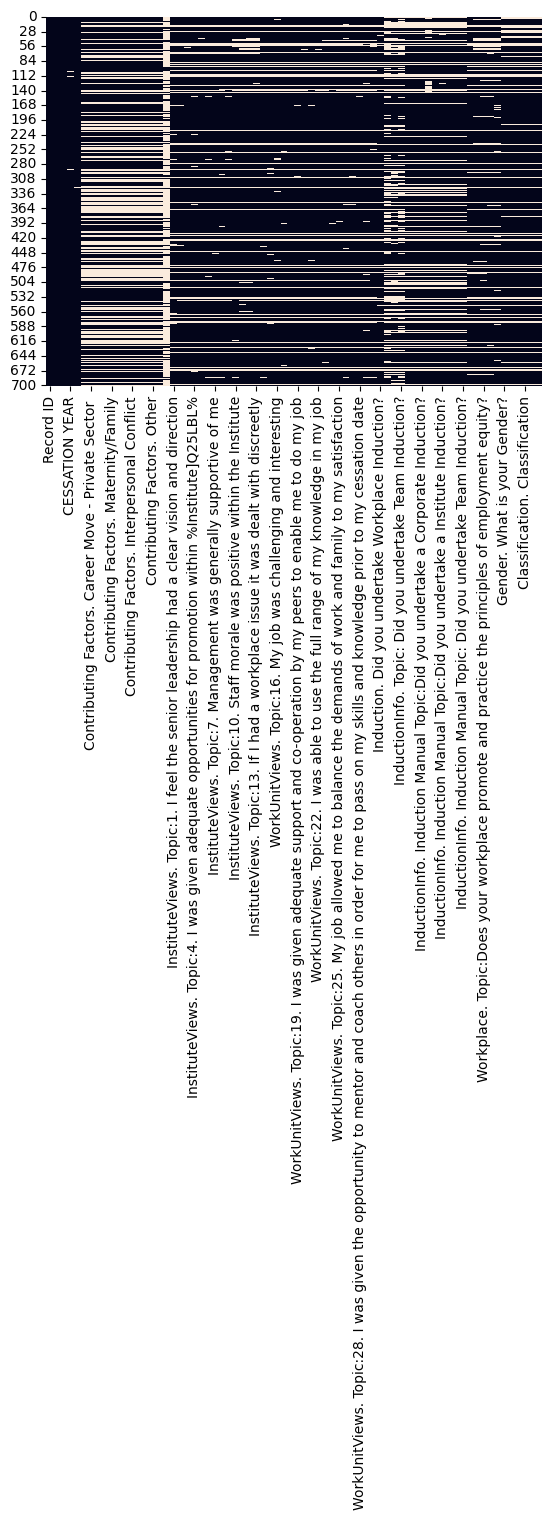

In [11]:
sns.heatmap(tafe_survey.isnull(), cbar=False)
plt.show()

### Updated Observations for TAFE Survey

#### **Structural Overview**
- **72 Columns Total**: Many columns relate to workplace satisfaction, induction processes, and demographics.
- **Critical Columns for Analysis**:
  - `Contributing Factors. Dissatisfaction` (437 non-null)
  - `Contributing Factors. Job Dissatisfaction` (437 non-null)
  - `LengthofServiceOverall` (596 non-null)
  - `CurrentAge` (596 non-null)
  - `Reason for ceasing employment` (701 non-null)

---

#### **Key Issues**
1. **Sparse Contributing Factors**:
   - Columns like `Contributing Factors. Career Move - Public Sector` (437/702 non-null) and `Main Factor. Which of these was the main factor for leaving?` (113/702 non-null) have **~38-84% missing data**. This limits direct analysis of dissatisfaction causes unless imputed or excluded.

2. **Verbose/Placeholder Column Names**:
   - Columns like `InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%` and `WorkUnitViews. Topic:21...` use unclear naming conventions, making them difficult to interpret. These will need renaming for usability.

3. **Demographic Gaps**:
   - `Gender`, `CurrentAge`, and `LengthofServiceOverall` have **106 missing values** (596/702 non-null). While manageable, this could affect subgroup analyses (e.g., age-related dissatisfaction trends).

4. **Redundant or Low-Value Columns**:
   - Many `InductionInfo` columns (e.g., `InductionInfo. On-line Topic: Did you undertake Team Induction?process...`) have inconsistent naming and high missingness (e.g., 432-619/702 non-null). These are likely irrelevant to our analysis and should be dropped.

---

#### **Actionable Insights**
1. **Focus on Dissatisfaction Columns**:
   - Prioritize `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` for dissatisfaction analysis. Consider combining them with DETE's analogous columns after addressing missingness.

2. **Standardize Column Names**:
   - Simplify names (e.g., rename `Contributing Factors. Dissatisfaction` to `TAFE_Dissatisfaction`).

3. **Handle Missing Demographic Data**:
   - Impute `CurrentAge` and `LengthofServiceOverall` using median/mode if missingness is random, or exclude rows if systematic.

4. **Drop Low-Value Columns**:
   - Remove `InductionInfo`, `WorkUnitViews`, and `InstituteViews` columns unless they directly relate to dissatisfaction (e.g., `Workplace. Topic:Would you recommend the Institute as an employer to others?`).

---

#### **Alignment with DETE Data**
- **Common Ground**: Both surveys include `Length of Service` and `Age`, which are critical for tenure/age dissatisfaction analysis.
- **Divergence**: TAFE’s contributing factors are spread across multiple columns, while DETE has dedicated `Job dissatisfaction` columns. Merging will require mapping TAFE’s factors to DETE’s structure.

This updated analysis ensures we focus on the most relevant data to answer stakeholder questions about tenure and age-related dissatisfaction. 🎯

In [12]:
dete_survey = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [13]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

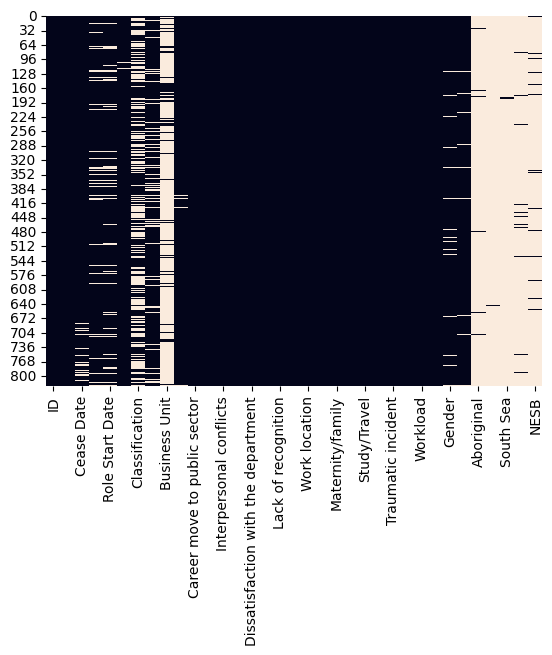

In [14]:
sns.heatmap(dete_survey.isnull(), cbar=False)
plt.show()

In [15]:
tafe_survey = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [16]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Career Move - Public Sector                            265
Contributing Factors. Career Move - Private Sector                           265
Contributing Factors. Career Move - Self-employment                          265
Contributing Factors. Ill Health                                             265
Contributing Factors. Maternity/Family                                       265
Contributing Factors. Dissatisfaction                                        265
Contributing Factors. Job Dissatisfaction                                    265
Contributing Factors. Interp

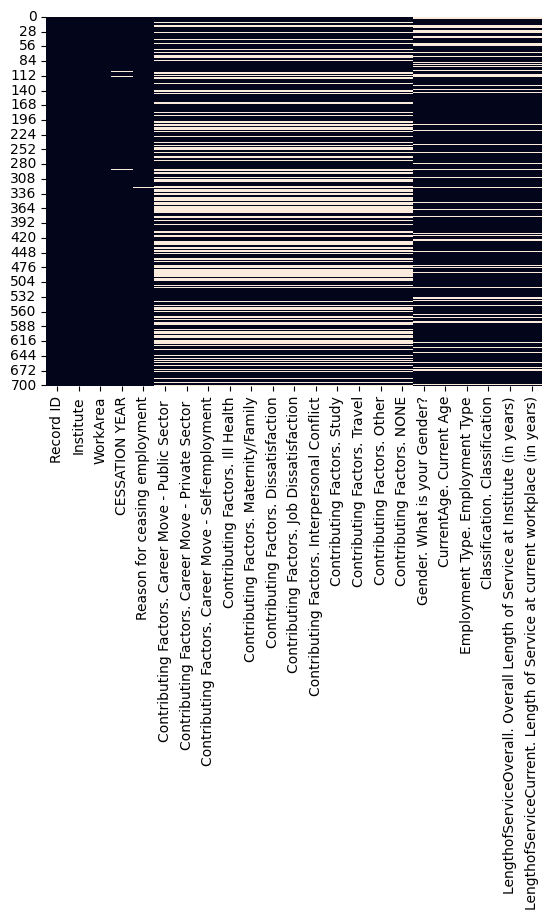

In [17]:
sns.heatmap(tafe_survey.isnull(), cbar=False)
plt.show()

# (ADD MARKDOWN HERE)

In [18]:
# Retains the actual total number of rows for each datasets
dete_number_of_rows = dete_survey.shape[0]
tafe_number_of_rows = tafe_survey.shape[0]

In [19]:
tafe_number_of_rows

702

In [20]:
dete_number_of_rows

822

In [21]:
# Step 1: Calculate the threshold for dropping columns
tafe_threshold = tafe_number_of_rows / 2
dete_threshold = 104 # we want to drop the region columns aswell

In [22]:
# Step 2: Identify columns with more than half the number of rows of missing values
tafe_columns_to_drop = tafe_survey.columns[tafe_survey.isnull().sum() > tafe_threshold]
dete_columns_to_drop = dete_survey.columns[dete_survey.isnull().sum() > dete_threshold]
print(f"Number of columns to drop from dete: {len(dete_columns_to_drop)}")
print(f"Number of columns to drop from tafe: {len(tafe_columns_to_drop)}")

Number of columns to drop from dete: 8
Number of columns to drop from tafe: 0


In [23]:
# Step 3: Drop those columns
dete_survey_after_column_drop = dete_survey.drop(columns=dete_columns_to_drop)
print(f"dete_survey shape after dropping columns: {dete_survey_after_column_drop.shape}")
tafe_survey_after_column_drop = tafe_survey.drop(columns=tafe_columns_to_drop)
print(f"tafe_survey shape after dropping columns: {tafe_survey_after_column_drop.shape}")

dete_survey shape after dropping columns: (822, 27)
tafe_survey shape after dropping columns: (702, 23)


In [24]:
# Step 4: Drop rows with any remaining missing values
dete_cleaned = dete_survey_after_column_drop.dropna()
print(f"dete_survey shape after dropping rows: {dete_cleaned.shape}")
tafe_cleaned = tafe_survey_after_column_drop.dropna()
print(f"dete_survey shape after dropping rows: {tafe_cleaned.shape}")


dete_survey shape after dropping rows: (670, 27)
dete_survey shape after dropping rows: (378, 23)


In [25]:
# Inspecting the dataset
dete_cleaned.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,...,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,Permanent Full-time,True,False,False,...,False,False,False,False,False,False,False,True,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,Permanent Full-time,False,False,False,...,False,False,False,False,False,True,False,False,Female,61 or older
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,Permanent Full-time,False,True,False,...,True,False,False,False,False,False,False,False,Female,41-45


In [26]:
dete_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 820
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   670 non-null    int64  
 1   SeparationType                       670 non-null    object 
 2   Cease Date                           670 non-null    object 
 3   DETE Start Date                      670 non-null    float64
 4   Role Start Date                      670 non-null    float64
 5   Position                             670 non-null    object 
 6   Employment Status                    670 non-null    object 
 7   Career move to public sector         670 non-null    bool   
 8   Career move to private sector        670 non-null    bool   
 9   Interpersonal conflicts              670 non-null    bool   
 10  Job dissatisfaction                  670 non-null    bool   
 11  Dissatisfaction with the department  

In [27]:
tafe_cleaned.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4


In [28]:
tafe_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 4 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  378 non-null    float64
 1   Institute                                                                  378 non-null    object 
 2   WorkArea                                                                   378 non-null    object 
 3   CESSATION YEAR                                                             378 non-null    float64
 4   Reason for ceasing employment                                              378 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          378 non-null    object 
 6   Contributing Factors. Career Move - Private Sector             

# (Mark Down cell)

In [29]:
# dete_survey_updated = dete_cleaned[['ID','SeparationType','Cease Date','DETE Start Date','Age','Gender']]
# dete_survey_updated.head()
dete_survey_updated = dete_cleaned
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,...,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,Permanent Full-time,True,False,False,...,False,False,False,False,False,False,False,True,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,Permanent Full-time,False,False,False,...,False,False,False,False,False,True,False,False,Female,61 or older
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,Permanent Full-time,False,True,False,...,True,False,False,False,False,False,False,False,Female,41-45


In [30]:
# tafe_survey_updated = tafe_cleaned[['Record ID','Reason for ceasing employment','CESSATION YEAR','LengthofServiceOverall. Overall Length of Service at Institute (in years)','CurrentAge. Current Age','Gender. What is your Gender?']]
# tafe_survey_updated.head()
tafe_survey_updated = tafe_cleaned
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4


## (We are going to rename the selected columns)

In [31]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,Permanent Full-time,True,False,False,...,False,False,False,False,False,False,False,True,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,Permanent Full-time,False,False,False,...,False,False,False,False,False,True,False,False,Female,61 or older
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,Permanent Full-time,False,True,False,...,True,False,False,False,False,False,False,False,Female,41-45


In [32]:
tafe_survey_updated = tafe_survey_updated.rename({'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis=1)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4


# (Markdown cell)

In [33]:
dete_survey_updated['separationtype'].value_counts()

separationtype
Age Retirement                          229
Resignation-Other reasons               120
Resignation-Other employer               78
Voluntary Early Retirement (VER)         60
Resignation-Move overseas/interstate     55
Ill Health Retirement                    47
Other                                    39
Contract Expired                         28
Termination                              14
Name: count, dtype: int64

In [34]:
tafe_survey_updated['separationtype'].value_counts()

separationtype
Resignation    288
Retirement      70
Transfer        20
Name: count, dtype: int64

### (We are interested in 'resignation') Markdown

In [35]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', case=True, na=False)].copy()

In [36]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 4 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   288 non-null    float64
 1   Institute                                            288 non-null    object 
 2   WorkArea                                             288 non-null    object 
 3   cease_date                                           288 non-null    float64
 4   separationtype                                       288 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    288 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   288 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  288 non-null    object 
 8   Contributing Factors. Ill Health                     288 non-null    object

In [37]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation', case=True, na=False)].copy()

In [38]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 3 to 819
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   253 non-null    int64  
 1   separationtype                       253 non-null    object 
 2   cease_date                           253 non-null    object 
 3   dete_start_date                      253 non-null    float64
 4   role_start_date                      253 non-null    float64
 5   position                             253 non-null    object 
 6   employment_status                    253 non-null    object 
 7   career_move_to_public_sector         253 non-null    bool   
 8   career_move_to_private_sector        253 non-null    bool   
 9   interpersonal_conflicts              253 non-null    bool   
 10  job_dissatisfaction                  253 non-null    bool   
 11  dissatisfaction_with_the_department  

## (Markdown cell)

In [39]:
dete_resignations['cease_date'].value_counts()

cease_date
2012       105
2013        63
01/2014     22
12/2013     13
06/2013     12
07/2013      9
09/2013      9
10/2013      5
11/2013      5
08/2013      3
05/2012      2
05/2013      2
07/2012      1
09/2010      1
07/2006      1
Name: count, dtype: int64

We will extract years from cease date column in dete

In [40]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'(\d{4})')
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

cease_date
2013.0    121
2012.0    108
2014.0     22
2010.0      1
2006.0      1
Name: count, dtype: int64

In [41]:
dete_resignations['dete_start_date'].value_counts()

dete_start_date
2011.0    23
2008.0    21
2007.0    19
2012.0    18
2010.0    17
2005.0    14
2009.0    13
2004.0    12
2013.0    10
2006.0    10
1999.0     7
1992.0     6
1994.0     6
2002.0     6
2003.0     6
2000.0     6
1993.0     5
1997.0     5
1996.0     5
1980.0     5
1998.0     4
1991.0     4
2001.0     3
1988.0     3
1985.0     3
1990.0     3
1986.0     3
1995.0     3
1989.0     3
1983.0     2
1976.0     1
1974.0     1
1973.0     1
1977.0     1
1982.0     1
1963.0     1
1972.0     1
1975.0     1
Name: count, dtype: int64

In [42]:
tafe_resignations['cease_date'].value_counts()

cease_date
2011.0    105
2012.0     86
2010.0     49
2013.0     46
2009.0      2
Name: count, dtype: int64

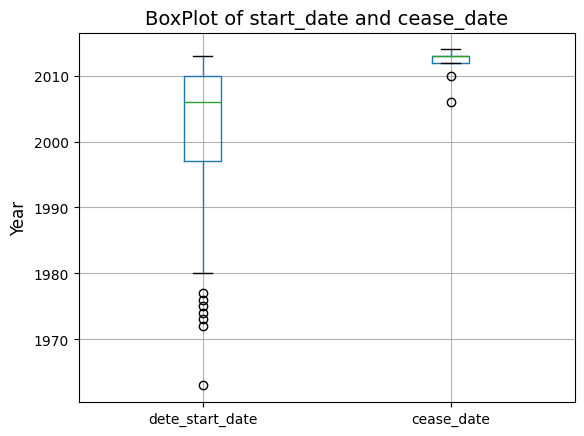

In [43]:
dete_resignations.boxplot(column=['dete_start_date', 'cease_date'])
plt.title('BoxPlot of start_date and cease_date', fontsize=14)
plt.ylabel('Year', fontsize=12)
plt.show()

### (Mark down) we create an institute service in dete dataset

In [44]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,...,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,False,Female,36-40,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,False,Female,41-45,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,False,Female,31-35,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,Permanent Part-time,False,False,True,...,False,False,False,False,False,False,False,Female,46-50,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Permanent Full-time,False,False,False,...,True,False,False,False,False,False,False,Male,31-35,3.0


In [45]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

Contributing Factors. Dissatisfaction
-                                         245
Contributing Factors. Dissatisfaction      43
Name: count, dtype: int64

In [46]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

Contributing Factors. Job Dissatisfaction
-                      233
Job Dissatisfaction     55
Name: count, dtype: int64

### step 7 markdown cell

In [47]:
def update_vals(column):
    for val in column:
        if pd.isnull(val):
            return np.nan
        elif val == '-':
            return False
        else:
            return True

In [48]:
tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].map(update_vals)
# comment it
bool_columns = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_resignations[bool_columns]].any(axis=1)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False


In [49]:
boolean_columns = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']
dete_resignations['dissatisfied'] = dete_resignations[dete_resignations[boolean_columns]].any(axis=1)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,...,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,Female,36-40,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,Female,41-45,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,Female,31-35,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,Permanent Part-time,False,False,True,...,False,False,False,False,False,False,Female,46-50,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,Male,31-35,3.0,False


# (Markdown cell)

In [50]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [51]:
common_columns = dete_resignations_up.columns.intersection(tafe_resignations_up.columns)
print("Common columns:", common_columns)

Common columns: Index(['id', 'separationtype', 'cease_date', 'position', 'employment_status',
       'gender', 'age', 'institute_service', 'dissatisfied', 'institute'],
      dtype='object')


### checking the columns they have in common

In [52]:
# Combining
combined = pd.concat([dete_resignations_up[common_columns], tafe_resignations_up[common_columns]], axis=0, ignore_index=True)
combined

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE
...,...,...,...,...,...,...,...,...,...,...
536,6.350599e+17,Resignation,2013.0,Administration (AO),Temporary Full-time,Female,26 30,1-2,False,TAFE
537,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
538,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
539,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


## (Markdown cell)

In [53]:
combined['institute_service'].astype(str)
combined['institute_service'].value_counts()

institute_service
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 24
5.0                   22
7-10                  21
1.0                   21
3.0                   19
0.0                   19
4.0                   16
6.0                   16
2.0                   14
9.0                   13
7.0                   12
More than 20 years    10
20.0                   7
8.0                    7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
15.0                   5
18.0                   5
22.0                   5
13.0                   5
11.0                   4
23.0                   4
16.0                   4
32.0                   3
19.0                   3
21.0                   3
24.0                   3
30.0                   2
26.0                   2
39.0                   2
28.0                   2
36.0                   1
35.0                   1
38.0   

In [54]:
# We define number functions to extract the value of institute service
def extract_mean_or_number(value):
    """
    Extracts a float from different formats in the 'institute_service' column.
    
    - If the value contains a '-', it takes the mean of the two numbers around it.
    - If the value contains a '.', it converts it directly to a float.
    - If the value is in the form 'More than X years', it extracts X as a float.
    - If the value is 'Less than 1 year', it returns 0.5 (assuming less than 1 is about 0.5).
    """
    value = str(value)  # Ensure it's a string for processing

    if '-' in value:  # Case: '3-4'
        parts = value.split('-')
        return (float(parts[0]) + float(parts[1])) / 2  # Compute the mean

    elif '.' in value:  # Case: '3.0'
        return float(value)  # Convert directly to float

    elif 'More than' in value:  # Case: 'More than 20 years'
        parts = value.split()
        return float(parts[-2])  # Extract the number before 'years'

    elif 'Less than' in value:  # Case: 'Less than 1 year'
        return 0.5  # Approximate value for 'less than 1'

    else:  # Fallback case, assume the value is already a number
        return float(value)

In [55]:
combined['processed_service'] = combined['institute_service'].apply(extract_mean_or_number)
combined['processed_service'].value_counts()

processed_service
0.5     73
1.5     64
3.5     63
5.5     33
15.5    24
5.0     22
1.0     21
8.5     21
0.0     19
3.0     19
20.0    17
6.0     16
4.0     16
2.0     14
9.0     13
7.0     12
8.0      7
14.0     6
10.0     6
12.0     6
17.0     6
18.0     5
15.0     5
13.0     5
22.0     5
23.0     4
16.0     4
11.0     4
32.0     3
21.0     3
19.0     3
24.0     3
28.0     2
39.0     2
30.0     2
26.0     2
35.0     1
38.0     1
36.0     1
33.0     1
25.0     1
27.0     1
41.0     1
49.0     1
29.0     1
34.0     1
31.0     1
Name: count, dtype: int64

In [58]:
# We define a function to map instite_service into career stage
def career_stage(years):
    """
        Categorizes a float value (years of experience) into predefined labels.
    
        New: Less than 3 years at a company
        Experienced: 3-6 years at a company
        Established: 7-10 years at a company
        Veteran: 11 or more years at a company
    """
    if years < 3:
        return "New"
    elif 3 <= years <= 6:
        return "Experienced"
    elif 7 <= years <= 10:
        return "Established"
    else:
        return "Veteran"

In [59]:
combined['service_cat'] = combined['processed_service'].apply(career_stage)
combined['service_cat'].value_counts()

service_cat
New            191
Experienced    169
Veteran        122
Established     59
Name: count, dtype: int64

### (Mark down cells about the changes made)

In [71]:
combined['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    336
True     205
Name: count, dtype: int64

In [72]:
pv_combined = combined.pivot_table('dissatisfied','service_cat')

In [73]:
pv_combined

,dissatisfied
service_cat,
Established,0.508475
Experienced,0.343195
New,0.298429
Veteran,0.491803


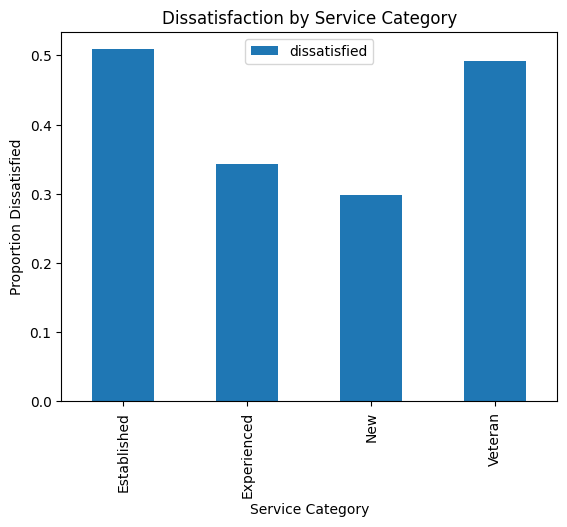

In [75]:
%matplotlib inline
pv_combined.plot(kind='bar')
plt.xlabel('Service Category')
plt.ylabel('Proportion Dissatisfied')
plt.title('Dissatisfaction by Service Category')
plt.show()

dissatisfied     False     True 
service_cat                     
Established   0.491525  0.508475
Experienced   0.656805  0.343195
New           0.701571  0.298429
Veteran       0.508197  0.491803


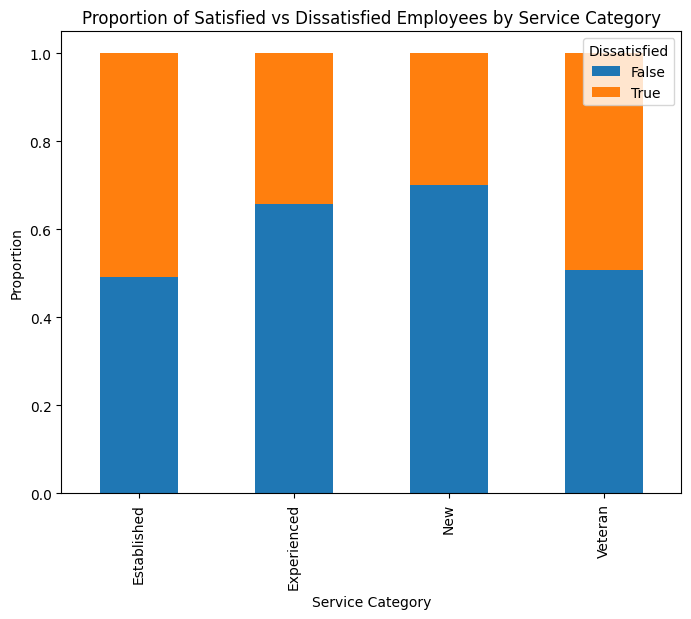

In [77]:
# Pivot table to count True and False values for each service_cat
pv_counts = combined.pivot_table(index='service_cat', columns='dissatisfied', aggfunc='size', fill_value=0)

# Convert counts to proportions
pv_proportions = pv_counts.div(pv_counts.sum(axis=1), axis=0)

# Verify the result
print(pv_proportions)

# Plot a stacked bar chart
pv_proportions.plot(kind='bar', stacked=True, figsize=(8, 6))

# Add labels and title
plt.xlabel('Service Category')
plt.ylabel('Proportion')
plt.title('Proportion of Satisfied vs Dissatisfied Employees by Service Category')
plt.legend(title='Dissatisfied', loc='upper right')
plt.show()